In [7]:
#Importar librerias
import numpy as np
import matplotlib.pyplot as plt
import pyroomacoustics as pra

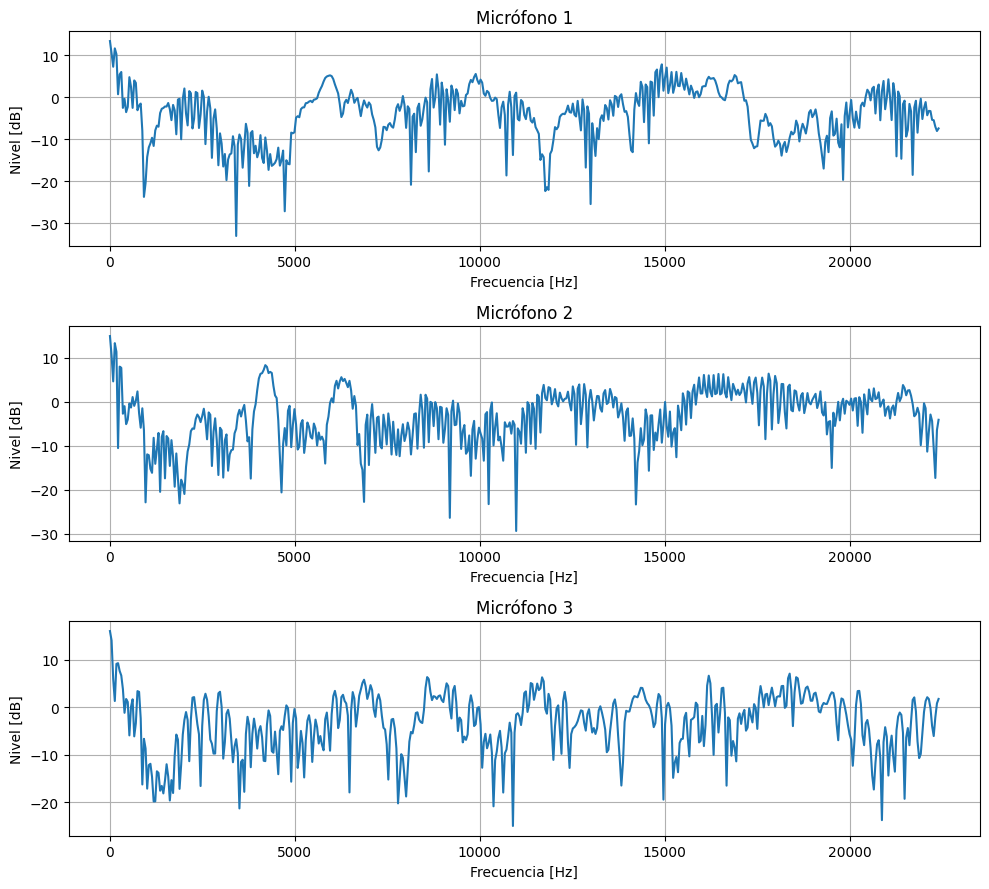

In [8]:
# Parámetros
fs = 44800  # frecuencia de muestreo
nfft = 1024  # para la resolución espectral
freqs = np.fft.rfftfreq(nfft, d=1/fs)  # eje de frecuencias

# Crear la sala
room_dim = [4, 6, 2]
room = pra.ShoeBox(room_dim, fs=fs, max_order=10)

# Ubicación de la fuente (esquina para 1.4)
source_corner = [0.1, 0.1, 0.1]
room.add_source(source_corner)

# Ubicaciones de micrófonos
mic_locs = np.c_[
    [1, 4, 1.5],
    [2, 4, 1.5],
    [3, 4, 1.5]
]
room.add_microphone_array(pra.MicrophoneArray(mic_locs, room.fs))

# Simulación
room.compute_rir()

# Calcular respuesta en frecuencia
responses_corner = []
for i in range(mic_locs.shape[1]):
    rir = room.rir[i][0]
    H = np.fft.rfft(rir, n=nfft)
    responses_corner.append(20 * np.log10(np.abs(H) + 1e-8))  # evitar log(0)


#ploteo
fig, axs = plt.subplots(3, 1, figsize=(10, 9))  # 3 filas, 1 columna

for i, response in enumerate(responses_corner):
    axs[i].plot(freqs, response)
    axs[i].set_title(f'Micrófono {i+1}')
    axs[i].set_xlabel('Frecuencia [Hz]')
    axs[i].set_ylabel('Nivel [dB]')
    axs[i].grid(True)

plt.tight_layout()
plt.show()